# Dec 12th, 2022 (AD: register N162)

**Motivation**: run the ANTs loop once again for N162 <br>

In [1]:
# HIDE CODE


import os
import sys
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from scipy.ndimage import gaussian_filter
from IPython.display import display, IFrame, HTML

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = pjoin(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

In [2]:
from register.register import Register, reset_ants_img

mice = Mice(512, load_parcel=True, load_allen=True)
reg = Register(mice)
reg.in_house

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (81, 46, 60)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (-7.8, -6.2, 6.4)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [3]:
kwargs = {
    'types': ['SyN', 'ElasticSyN'],
    'grads': [0.10, 0.25, 0.30, 0.35, 0.38, 0.40, 0.42, 0.45, 0.5, 0.60, 0.9, 1.1, 1.5],
    'syn_bins': [64, 48, 32, 16, 10],
    'aff_bins': [13, 20, 25, 32, 64],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10,
}
kwargs

{
    'types': ['SyN', 'ElasticSyN'],
    'grads': [
        0.1,
        0.25,
        0.3,
        0.35,
        0.38,
        0.4,
        0.42,
        0.45,
        0.5,
        0.6,
        0.9,
        1.1,
        1.5
    ],
    'syn_bins': [64, 48, 32, 16, 10],
    'aff_bins': [13, 20, 25, 32, 64],
    'aff_rates': [0.2, 0.4, 0.6, 0.8],
    'aff_metric': 'mattes',
    'syn_metric': 'mattes',
    'mi_q': 0.5,
    'n_seeds': 10
}

In [4]:
reg.set_mode('bold')
reg.mi_base = None

 bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


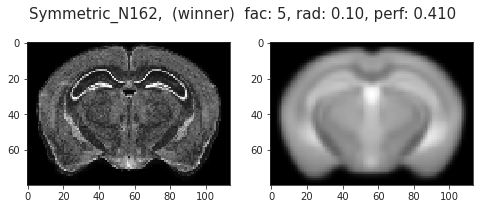

Symmetric_N162, perf:

 seed type  grad  syn_bin  aff_bin  aff_rate   metric    score
    0  SyN   0.6       32       25       0.8       mi 0.526354
    0  SyN   0.6       32       25       0.8  ovp_MOp 0.998095
    0  SyN   0.6       32       25       0.8  sym_MOp 1.000000
    0  SyN   0.6       32       25       0.8  ovp_MOs 1.000000
    0  SyN   0.6       32       25       0.8  sym_MOs 0.994595
    0  SyN   0.6       32       25       0.8   ovp_SS 1.000000
    0  SyN   0.6       32       25       0.8   sym_SS 0.994226
    0  SyN   0.6       32       25       0.8 ovp_VISC 1.000000
    0  SyN   0.6       32       25       0.8 sym_VISC 0.981132
    0  SyN   0.6       32       25       0.8  ovp_VIS 1.000000
    0  SyN   0.6       32       25       0.8  sym_VIS 1.000000
    0  SyN   0.6       32       25       0.8   ovp_AI 0.988889
    0  SyN   0.6       32       25       0.8   sym_AI 0.972603
    0  SyN   0.6       32       25       0.8 ovp_PTLp 1.000000
    0  SyN   0.6       32       25       0.8 sym_PTLp 0.990291
    0  SyN   0.6       32       25       0.8  ovp_TEa 1.000000
    0  SyN   0.6       32       25       0.8  sym_TEa 0.983051
    0  SyN   0.6       32       25       0.8  ovp_CA1 1.000000
    0  SyN   0.6       32       25       0.8  sym_CA1 0.993007
    0  SyN   0.6       32       25       0.8  ovp_CLA 1.000000
    0  SyN   0.6       32       25       0.8  sym_CLA 0.925926
    0  SyN   0.6       32       25       0.8 ovp_STRd 1.000000
    0  SyN   0.6       32       25       0.8 sym_STRd 0.995805
    0  SyN   0.6       32       25       0.8  ovp_iso 0.998704
    0  SyN   0.6       32       25       0.8  sym_iso 0.986957
    0  SyN   0.6       32       25       0.8      sym 0.993369
    0  SyN   0.6       32       25       0.8      ovp 0.999118

CPU times: user 38d 10h 2min 38s, sys: 1d 5h 8min 5s, total: 39d 15h 10min 43s
Wall time: 2d 7h 55min 25s


In [5]:
%%time

results = reg.fit_register(
    name=reg.in_house_name,
    moving=reg.in_house,
    fixed=reg.nissl,
    save_results=True,
    **kwargs,
)

## Continue with recreating performance plots

https://hadivafaii.github.io/jb-Ca-fMRI/nb/apr22/apr-16-2022.html

In [6]:
list(results)

['df', 'tx_id', 'moving_aff', 'perf']

In [7]:
results['tx_id']

'seed-0_type-SyN_grad-0.60_synbin-32_affbin-25_affrate-0.8'

In [8]:
def _bst_tx(name, df_tx, mi_q, verbose=False):
    mi = df_tx.loc[df_tx['metric'] == 'mi']
    sym = df_tx.loc[df_tx['metric'] == 'sym']
    mi = mi.reset_index(drop=True)
    sym = sym.reset_index(drop=True)
    cond = mi['score'] > np.nanquantile(mi['score'], mi_q)
    _df = sym.loc[cond]
    try:
        best_params = _df.iloc[_df['score'].argmax()]
    except ValueError:
        cond = mi['score'] > np.nanquantile(mi['score'], 2 * mi_q / 3)
        _df = sym.loc[cond]
        best_params = _df.iloc[_df['score'].argmax()]
    best_params = best_params.drop(['metric', 'score'])
    best_params = dict(best_params)
    cond = functools.reduce(
        lambda x, y: x & y, [
            df_tx[k] == v for k, v
            in best_params.items()
        ],
    )
    _df = df_tx.loc[cond]
    if verbose:
        msg = f"{name}, perf:\n\n"
        msg += f"{_df.to_string(index=False)}\n"
        print(msg)
    return best_params, _df

In [19]:
best_params

{
    'seed': 2,
    'type': 'ElasticSyN',
    'grad': 0.6,
    'syn_bin': 32,
    'aff_bin': 64,
    'aff_rate': 0.4
}

In [20]:
df = []
for q in [0.5, 0.55, 0.6, 0.65, 0.70, 0.75, 0.8, 0.85, 0.9, 0.95]:
    best_params, _df = _bst_tx(reg.in_house_name, results['df'], q, False)
    mi = _df.loc[_df['metric'] == 'mi', 'score'].item()
    sym = _df.loc[_df['metric'] == 'sym', 'score'].item()
    data = {
        'mi': mi,
        'sym': sym,
        **best_params,
    }
    print(mi, sym, best_params)
    df.append({
        'q': [q] * len(data),
        'label': data.keys(),
        'value': data.values(),
    })
df = pd.DataFrame(merge_dicts(df))

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5263542393497967 0.9933687570085176
{'seed': 0, 'type': 'SyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 25, 'aff_rate': 0.8}

0.5272586878466358 0.9905814127869002
{'seed': 2, 'type': 'ElasticSyN', 'grad': 0.6, 'syn_bin': 32, 'aff_bin': 64, 'aff_rate': 0.4}

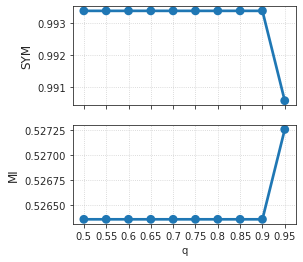

In [21]:
fig, axes = create_figure(2, 1, (4, 4), sharex='all')
sns.pointplot(data=df.loc[df['label'] == 'sym'], x='q', y='value', ax=axes[0])
sns.pointplot(data=df.loc[df['label'] == 'mi'], x='q', y='value', ax=axes[1])
axes[0].set_xlabel('')
axes[0].set_ylabel('SYM', fontsize=12)
axes[1].set_ylabel('MI', fontsize=12)
add_grid(axes)
plt.show()

In [37]:
mi = results['df'].loc[results['df']['metric'] == 'mi', 'score'].values
sym = results['df'].loc[results['df']['metric'] == 'sym', 'score'].values
sym_iso = results['df'].loc[results['df']['metric'] == 'sym_iso', 'score'].values

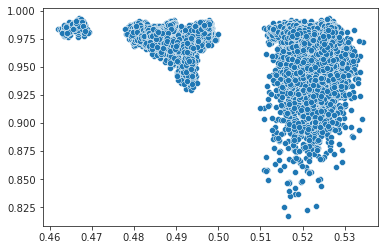

In [38]:
sns.scatterplot(mi, sym);

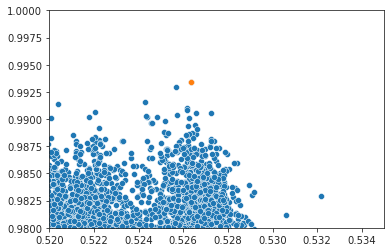

In [36]:
fig, ax = create_figure(1, 1)
sns.scatterplot(mi, sym, ax=ax)
sns.scatterplot([0.5263542393497967], [0.9933687570085176], color='C1', ax=ax)
ax.set(xlim=(0.52, 0.535), ylim=(0.98, 1.00))
plt.show()

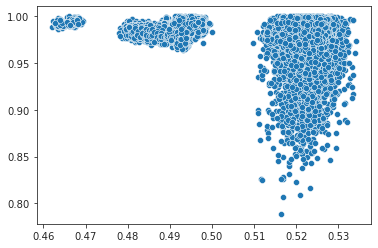

In [43]:
sns.scatterplot(mi, sym_iso);

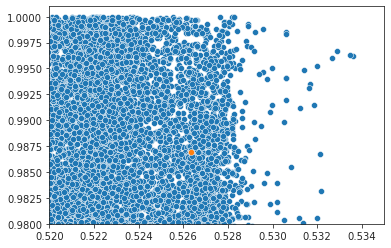

In [45]:
fig, ax = create_figure(1, 1)
sns.scatterplot(mi, sym_iso, ax=ax)
sns.scatterplot([0.5263542393497967], [0.986957], color='C1', ax=ax)
ax.set(xlim=(0.52, 0.535), ylim=(0.98, 1.001))
plt.show()

## Find which parameter combinations were bad

In [105]:
df = results['df'].loc[results['df']['metric'].isin(['mi', 'sym'])]
df = df.pivot_table(
    values='score',
    columns='metric',
    index=[c for c in df.columns if c not in ['score', 'metric']],
).reset_index()

In [106]:
df

metric,seed,type,grad,syn_bin,aff_bin,aff_rate,mi,sym
0,0,ElasticSyN,0.1,10,13,0.2,0.464792,0.986592
1,0,ElasticSyN,0.1,10,13,0.4,0.464216,0.986393
2,0,ElasticSyN,0.1,10,13,0.6,0.464368,0.983254
3,0,ElasticSyN,0.1,10,13,0.8,0.464052,0.981544
4,0,ElasticSyN,0.1,10,20,0.2,0.466939,0.980138
...,...,...,...,...,...,...,...,...
25995,9,SyN,1.5,64,32,0.8,0.524560,0.891738
25996,9,SyN,1.5,64,64,0.2,0.529963,0.932523
25997,9,SyN,1.5,64,64,0.4,0.519376,0.923028
25998,9,SyN,1.5,64,64,0.6,0.528551,0.940016


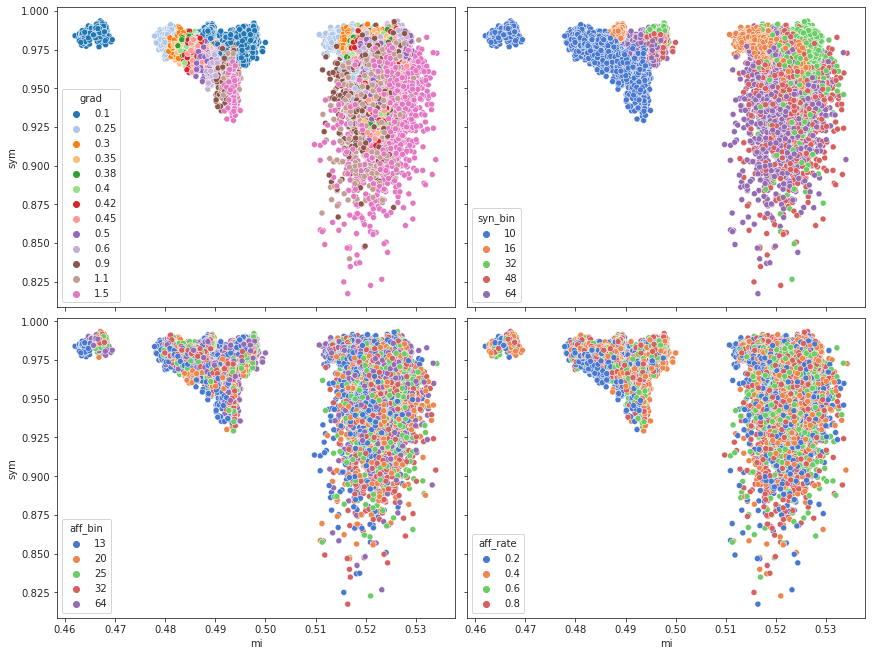

In [123]:
fig, axes = create_figure(2, 2, (12, 9), 'all', 'all', constrained_layout=True)
sns.scatterplot(data=df, x='mi', y='sym', hue='grad', palette='tab20', ax=axes[0, 0])
sns.scatterplot(data=df, x='mi', y='sym', hue='syn_bin', palette='muted', ax=axes[0, 1])
sns.scatterplot(data=df, x='mi', y='sym', hue='aff_bin', palette='muted', ax=axes[1, 0])
sns.scatterplot(data=df, x='mi', y='sym', hue='aff_rate', palette='muted', ax=axes[1, 1])
plt.show()

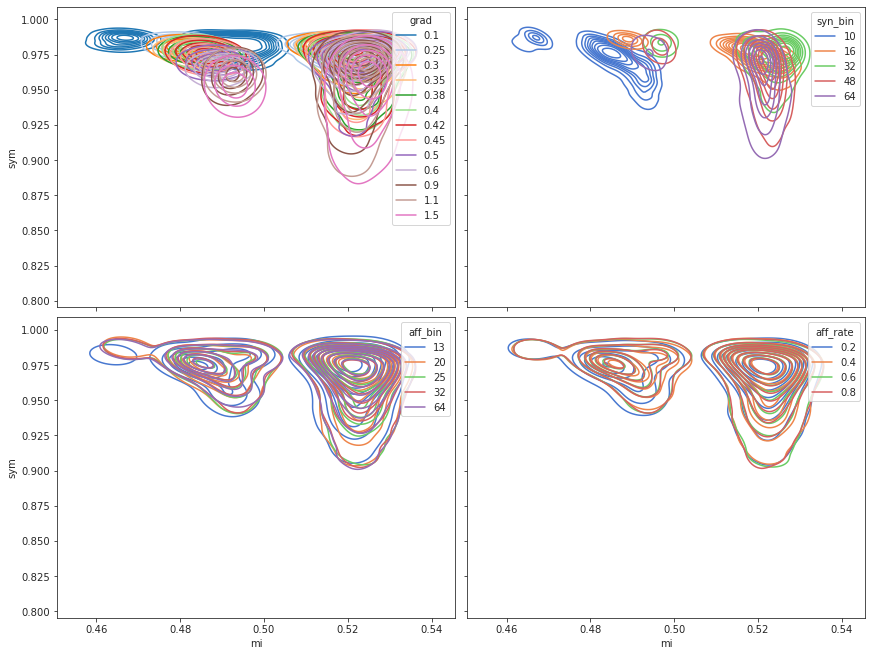

In [126]:
fig, axes = create_figure(2, 2, (12, 9), 'all', 'all', constrained_layout=True)
sns.kdeplot(data=df, x='mi', y='sym', hue='grad', palette='tab20', ax=axes[0, 0])
sns.kdeplot(data=df, x='mi', y='sym', hue='syn_bin', palette='muted', ax=axes[0, 1])
sns.kdeplot(data=df, x='mi', y='sym', hue='aff_bin', palette='muted', ax=axes[1, 0])
sns.kdeplot(data=df, x='mi', y='sym', hue='aff_rate', palette='muted', ax=axes[1, 1])
plt.show()

## Chack quality

In [62]:
tx, tx_aff = reg.load_tx(reg.in_house_name, is_inv=False)

affined = tx_aff.apply_to_image(
    image=reg.in_house,
    reference=reg.nissl,
    interpolation='linear',
)
warped = ants.apply_transforms(
    fixed=reg.nissl,
    moving=affined,
    transformlist=tx,
    interpolator='linear',
)

# save warped
warped_file = [
    reg.in_house_name,
    f"space-{reg.space}{reg.dim}",
    'T1w',
]
warped_file = '_'.join(warped_file)
warped_file += '.nii.gz'
warped_file = pjoin(
    reg.mice.cfg.warped_dir, warped_file)
ants.image_write(warped, warped_file)

In [79]:
# save Nissl and Template

ants.image_write(reg.nissl, pjoin(mice.cfg.warped_dir, 'nissl100.nii.gz'))
ants.image_write(reg.img_in_ccf(mice.al.template, float), pjoin(mice.cfg.warped_dir, 'template100.nii.gz'))

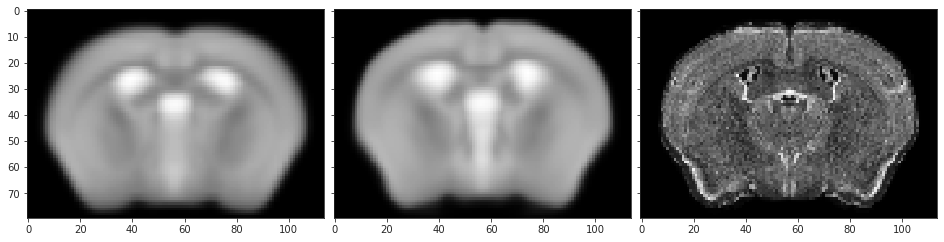

In [80]:
fig, axes = create_figure(1, 3, (13, 6), 'all', 'all', constrained_layout=True)
axes[0].imshow(affined[60], cmap='Greys_r')
axes[1].imshow(warped[60], cmap='Greys_r')
axes[2].imshow(reg.nissl[60], cmap='Greys_r')
plt.show()

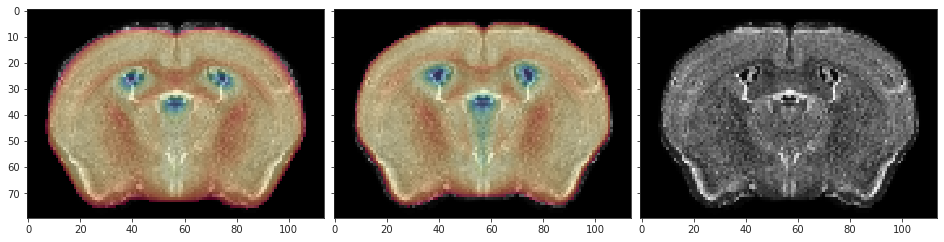

In [84]:
fig, axes = create_figure(1, 3, (13, 6), 'all', 'all', constrained_layout=True)
for i in range(3):
    axes[i].imshow(reg.nissl[60], cmap='Greys_r')
axes[0].imshow(mwh(affined[60] < 4000, affined[60]), alpha=0.5, cmap='Spectral')
axes[1].imshow(mwh(warped[60] < 4000, warped[60]), alpha=0.5, cmap='Spectral')
# axes[2].imshow(reg.nissl[60], cmap='Greys_r')
plt.show()

In [70]:
mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)
mi_aff = ants.image_mutual_information(reg.nissl, affined)
mi_syn = ants.image_mutual_information(reg.nissl, warped)

mi_aff /= mi_base
mi_syn /= mi_base

mi_aff, mi_syn

(0.41501759487481366, 0.526354226907422)

## Save objects

In [88]:
tx, tx_aff = reg.load_tx(reg.in_house_name)

obj = reg._apply_tx_obj2lps(
    name=reg.in_house_name,
    moving=affined,
    moving_orig=reg.in_house,
    tx_aff=tx_aff,
    tx=tx,
    use_mm=True,
    save_results=True,
)

In [90]:
list(obj)

[
    'cols',
    'cortex',
    'cortex-top',
    'subcortex-l',
    'subcortex-r',
    'subcortex',
    'CH',
    'brain',
    'misc',
    'iso',
    'hemis'
]

In [127]:
obj['cols']

ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (60, 46, 81)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [140]:
in_house = reg.load_in_house()
in_house

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (60, 46, 81)
         Spacing    : (0.2, 0.2, 0.2)
         Origin     : (6.4, -6.2, -7.8)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

<matplotlib.image.AxesImage object at 0x7f7750dde7f0>

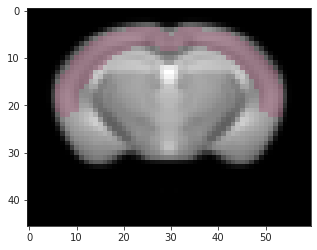

In [165]:
x2p = obj['cols'].numpy()
x2p = mwh(x2p == 0, x2p)

plt.imshow(in_house[..., 40].T, cmap='Greys_r')
plt.imshow(x2p[..., 40].T > 0, cmap='Spectral', alpha=0.2)

<matplotlib.image.AxesImage object at 0x7f7750e89790>

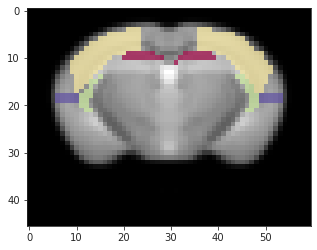

In [163]:
x2p = obj['misc'].numpy()
x2p = mwh(x2p == 0, x2p)

plt.imshow(in_house[..., 40].T, cmap='Greys_r')
plt.imshow(x2p[..., 40].T , cmap='Spectral', alpha=0.7)

In [166]:
files = sorted(filter(
    lambda f: 'sub-DKI' in f or 'sub-WT'in f,
    os.listdir(mice.cfg.raw_dir),
))
len(files)

348

In [ ]:
brain_mask = []
for f in files:
    x = ants.image_read(pjoin(mice.cfg.raw_dir, f))
    x = x.numpy()[:, :, 40, :]
    brain_mask.append(np.abs(x).sum(-1) > 0)

In [173]:
mask_all = functools.reduce(np.logical_or, brain_mask)
mask_all = mask_all.T[::-1][:, ::-1]
mask_all.shape

(46, 60)

<matplotlib.image.AxesImage object at 0x7f7767e55ac0>

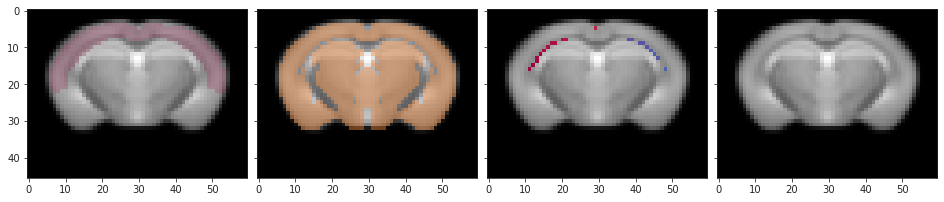

In [201]:
x2p = obj['cols'].numpy()
x2p = mwh(x2p == 0, x2p)
x2p = x2p[..., 40].T 

fig, axes = create_figure(1, 4, (13, 3), 'all', 'all', constrained_layout=True)

for i in range(4):
    axes[i].imshow(in_house[..., 40].T, cmap='Greys_r')

axes[0].imshow(x2p > 0, cmap='Spectral', alpha=0.2)
axes[1].imshow(mwh(mask_all == 0, mask_all), cmap='Oranges', vmin=0, vmax=2, alpha=0.4)
axes[2].imshow(mwh(~np.logical_and(~mask_all, x2p > 0), x2p), cmap='Spectral')
axes[3].imshow(mwh(~np.logical_and(mask_all > 0, x2p == 0), x2p), cmap='Spectral')

In [205]:
np.logical_and(mask_all > 0, x2p == 0).sum(), np.logical_and(mask_all == 0, x2p != 0).sum()

(0, 21)

In [206]:
overlap_score(mask_all, x2p > 0)

0.9278350515463918